In [1]:
from tsp import TSP
from tsp.solvers import NNHead, NNWhole, GreedyCycle, RandomSolver, RegretGreedyCycle
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

plt.rcParams['figure.figsize'] = [20, 10]

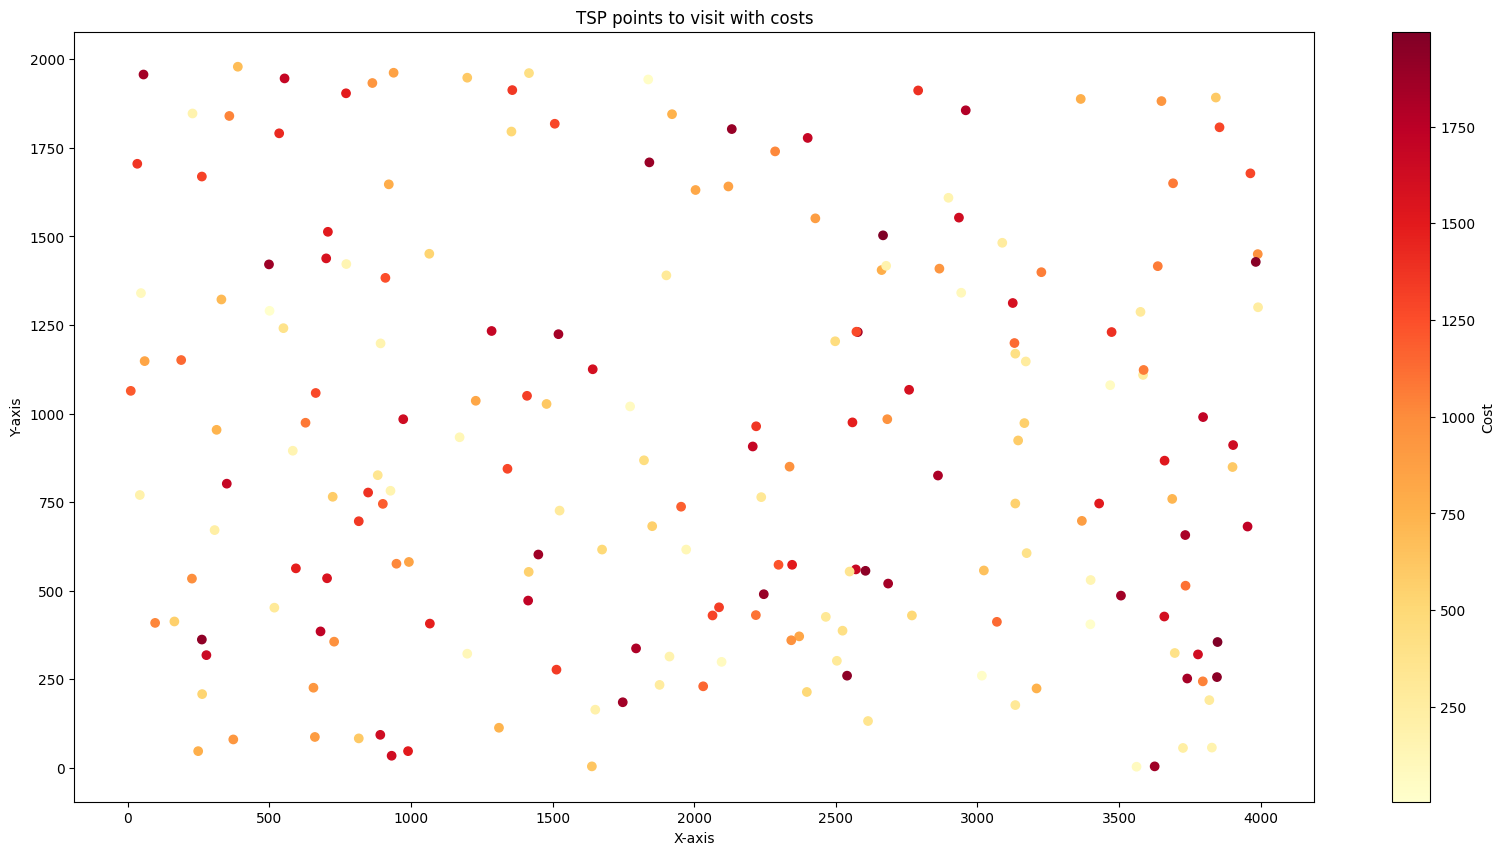

In [2]:
instance_a = TSP.from_csv('../data/TSPA.csv')
instance_a.visualize()

In [7]:
np.argsort(instance_a.D)

array([[  0, 183, 143, ...,  88, 188,  50],
       [ 97, 101,   1, ..., 147,  67, 134],
       [120,   2, 101, ...,  20, 147, 134],
       ...,
       [ 59,  65, 115, ...,  50, 188, 107],
       [139, 115, 193, ..., 107,  50, 188],
       [ 18, 193,  22, ..., 107,  50, 188]])

In [ ]:
solver = RandomSolver(instance_a)
solution = solver.solve()
instance_a.visualize(solution)

In [ ]:
solver = NNHead(instance_a, starting_node=0)
solution = solver.solve()
instance_a.visualize(solution)

In [ ]:
scores = []
for i in range(200):
    solver = NNHead(instance_a, starting_node=i)
    solution = solver.solve()
    scores.append(instance_a.score(solution))
np.mean(scores)

In [ ]:
solver = NNWhole(instance_a, starting_node=0)
solution = solver.solve()
instance_a.visualize(solution)

In [ ]:
scores = []
for i in range(200):
    solver = NNWhole(instance_a, starting_node=i)
    solution = solver.solve()
    scores.append(instance_a.score(solution))
np.mean(scores)

In [ ]:
solver = GreedyCycle(instance_a, starting_node=0)
solution = solver.solve()
instance_a.visualize(solution)

In [ ]:
scores = []
for i in range(200):
    solver = GreedyCycle(instance_a, starting_node=i)
    solution = solver.solve()
    scores.append(instance_a.score(solution))
np.mean(scores)

In [13]:
from tsp.solvers import Solver, pairwise_circular, GreedyCycle
from tsp import TSP

import numpy as np
import numba as nb


class RegretGreedyCycle(Solver):
    def __init__(self, problem: TSP, starting_node: int):
        self.problem = problem
        self.starting_node = starting_node

    def solve(self) -> np.ndarray:
        return RegretGreedyCycle._solve(
            self.problem.D,
            self.starting_node,
            self.problem.solution_size,
        )

    @staticmethod
    def _solve(D, starting, solution_size):
        solution = [starting]
        visited = np.zeros(len(D))
        visited[starting] = 1

        for _ in range(solution_size - 1):
            best_i, best_node, best_regret = -1, -1, np.inf
            for node in np.where(visited == 0)[0]:
                bests = []
                for i, (first, second) in enumerate(pairwise_circular(solution)):
                    delta = D[first, node] + D[node, second] - D[first, second]
                    bests.append((delta,i))
                
                if(len(bests)==1):
                    best_node = node
                else:
                    bests = sorted(bests, key=lambda x: x[0])
                print(bests)
                regret = bests[0][0] - bests[1][0]
                if delta < best_regret:
                    best_i, best_node, best_regret = bests[0][1], node, regret
            solution.insert(best_i + 1, best_node)
            visited[best_node] = 1
        return np.array(solution)

In [14]:
instance = TSP.from_csv("../data/" + "TSPA.csv")
solver = RegretGreedyCycle(instance, starting_node=0)
s = solver.solve()
s

[(4076.0, 0)]


IndexError: list index out of range